In [104]:
from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
import pymysql.cursors
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
import matplotlib.pylab as plt
import datetime
import urllib.request
import json

## 구글트렌드, 카카오트렌드, 네이버 데이터랩 월간 데이터 db에 저장

### google

In [105]:
googletrends_df = pd.read_csv('./data/googletrend-month.csv', header=1, sep=',', skip_blank_lines = True)
googletrends_df = googletrends_df.rename({'월': 'date', '경제: (대한민국)':'ratio'}, axis = 'columns')
googletrends_df.head()

,date,ratio
0,2008-07,79
1,2008-08,66
2,2008-09,90
3,2008-10,99
4,2008-11,100


### kakao

In [106]:
kakaotrends_df = pd.read_csv('./data/kakaotrend-month.csv', header=7, sep=',', skip_blank_lines = True)
kakaotrends_df = kakaotrends_df[0:33]
kakaotrends_df = kakaotrends_df.rename({'일': 'date', '경제':'ratio'}, axis = 'columns')
kakaotrends_df.head()

,date,ratio
0,2018-01-01,35
1,2018-02-01,35
2,2018-03-01,37
3,2018-04-01,32
4,2018-05-01,38


### naver

In [107]:
client_id = "YOUR_CLIENT_ID"
client_secret = "YOUR_CLIENT_SECRET"

start_date = '2016-01-01'
today = datetime.date.today().strftime('%Y-%m-%d')
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\""+start_date+"\",\"endDate\":\""+today+"\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"경제\",\"keywords\":[\"경제\"]}]}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data = body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    scrapped = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

In [108]:
jsonResult = json.loads(scrapped)
navertrends_df = pd.DataFrame(jsonResult['results'][0]['data'])
navertrends_df = navertrends_df.rename({'period': 'date'}, axis = 'columns')
navertrends_df.head()

,date,ratio
0,2016-01-01,35.97307
1,2016-02-01,32.22267
2,2016-03-01,41.77220
3,2016-04-01,35.81074
4,2016-05-01,38.99718


### DB연동

In [110]:
conn = pymysql.connect(host = "127.0.0.1", user = [USER], passwd = [PASSWORD], db = [DATABASE], cursorclass = pymysql.cursors.DictCursor)
cur = conn.cursor()

cur.execute("show databases")
print(cur.fetchall())
cur.execute("use CLI")

[{'Database': 'information_schema'}, {'Database': 'CLI'}, {'Database': 'MusicBank'}, {'Database': 'mysql'}, {'Database': 'mytestdb'}, {'Database': 'performance_schema'}, {'Database': 'sys'}]


0

### 검색어 트렌드 정보 저장 테이블 생성

In [112]:
create_table_query = """
CREATE TABLE IF NOT EXISTS google_counting_month(
    id BIGINT(7) NOT NULL AUTO_INCREMENT,
    year bigint(4) NOT NULL,
    month bigint(2) NOT NULL,
    cnt double,
    primary key(id) )
    charset=utf8mb4;
"""
cur.execute(create_table_query)
conn.commit()

In [114]:
create_table_query = """
CREATE TABLE IF NOT EXISTS kakao_counting_month(
    id BIGINT(7) NOT NULL AUTO_INCREMENT,
    year bigint(4) NOT NULL,
    month bigint(2) NOT NULL,
    cnt double,
    primary key(id) )
    charset=utf8mb4;
"""
cur.execute(create_table_query)
conn.commit()

In [115]:
create_table_query = """
CREATE TABLE IF NOT EXISTS naver_counting_month(
    id BIGINT(7) NOT NULL AUTO_INCREMENT,
    year bigint(4) NOT NULL,
    month bigint(2) NOT NULL,
    cnt double,
    primary key(id) )
    charset=utf8mb4;
"""
cur.execute(create_table_query)
conn.commit()

###  db table에 저장

In [116]:
"""
날짜에서 year, month 추출
"""
def extract_year_and_month(period):
    year = period.split('-')[0]
    month = period.split('-')[1]
    return year, month


In [117]:
for i in range(len(googletrends_df)):
    query = """ 
    Insert into google_counting_month (year, month, cnt) values (%d, %d, %f) ;
    """
    year, month = extract_year_and_month(googletrends_df.iloc[i].date)
    google_cnt = googletrends_df.iloc[i].ratio

    mystring = (query % (int(year), int(month), float(google_cnt)))
    print(mystring)
    cur.execute(mystring)
    conn.commit()

 
    Insert into google_counting_month (year, month, cnt) values (2008, 7, 79.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 8, 66.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 9, 90.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 10, 99.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 11, 100.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2008, 12, 84.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 1, 68.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 2, 72.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 3, 60.000000) ;
    
 
    Insert into google_counting_month (year, month, cnt) values (2009, 4, 83.000000) ;
    
 
    Insert into google_counting_month (year, month, cn

In [118]:
for i in range(len(kakaotrends_df)):
    query = """ 
    Insert into kakao_counting_month (year, month, cnt) values (%d, %d, %f) ;
    """
    year, month = extract_year_and_month(kakaotrends_df.iloc[i].date)
    kakao_cnt = kakaotrends_df.iloc[i].ratio

    mystring = (query % (int(year), int(month), float(kakao_cnt)))
    print(mystring)
    cur.execute(mystring)

 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 1, 35.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 2, 35.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 3, 37.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 4, 32.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 5, 38.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 6, 49.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 7, 50.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 8, 56.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 9, 36.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (2018, 10, 60.000000) ;
    
 
    Insert into kakao_counting_month (year, month, cnt) values (201

In [119]:
for i in range(len(navertrends_df)):
    query = """ 
    Insert into naver_counting_month (year, month, cnt) values (%d, %d, %f) ;
    """
    year, month = extract_year_and_month(navertrends_df.iloc[i].date)
    naver_cnt = navertrends_df.iloc[i].ratio

    mystring = (query % (int(year), int(month), float(naver_cnt)))
    print(mystring)
    cur.execute(mystring)

 
    Insert into naver_counting_month (year, month, cnt) values (2016, 1, 35.973070) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 2, 32.222670) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 3, 41.772200) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 4, 35.810740) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 5, 38.997180) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 6, 39.793440) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 7, 29.439250) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 8, 29.454650) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 9, 31.112940) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (2016, 10, 34.916520) ;
    
 
    Insert into naver_counting_month (year, month, cnt) values (201

In [120]:
conn.commit()

### 확인

In [121]:
query = """ 
select * from google_counting_month ;
"""
cur.execute(query)
tmp=pd.DataFrame(list(cur.fetchall()))
tmp

,id,year,month,cnt
0,1,2008,7,79.0
1,2,2008,8,66.0
2,3,2008,9,90.0
3,4,2008,10,99.0
4,5,2008,11,100.0
...,...,...,...,...
143,144,2020,6,46.0
144,145,2020,7,41.0
145,146,2020,8,39.0
146,147,2020,9,41.0


In [122]:
query = """ 
select * from kakao_counting_month ;
"""
cur.execute(query)
tmp = pd.DataFrame(list(cur.fetchall()))
tmp

,id,year,month,cnt
0,1,2018,1,35.0
1,2,2018,2,35.0
2,3,2018,3,37.0
3,4,2018,4,32.0
4,5,2018,5,38.0
5,6,2018,6,49.0
6,7,2018,7,50.0
7,8,2018,8,56.0
8,9,2018,9,36.0
9,10,2018,10,60.0


In [123]:
query = """ 
select * from naver_counting_month ;
"""
cur.execute(query)
tmp = pd.DataFrame(list(cur.fetchall()))
tmp

,id,year,month,cnt
0,1,2016,1,35.97307
1,2,2016,2,32.22267
2,3,2016,3,41.77220
3,4,2016,4,35.81074
4,5,2016,5,38.99718
5,6,2016,6,39.79344
6,7,2016,7,29.43925
7,8,2016,8,29.45465
8,9,2016,9,31.11294
9,10,2016,10,34.91652



## '경제' 키워드 검색비율 - CCI(경기동행지수) table join

### google

In [124]:
sql1 = "select * from google_counting_month"
cur.execute(sql1)
result1 = cur.fetchall()

google_trend = pd.DataFrame(result1)
google_trend = google_trend.drop('id', axis = 1)
google_trend = google_trend.drop([146, 147], 0)
google_trend

,year,month,cnt
0,2008,7,79.0
1,2008,8,66.0
2,2008,9,90.0
3,2008,10,99.0
4,2008,11,100.0
...,...,...,...
141,2020,4,45.0
142,2020,5,43.0
143,2020,6,46.0
144,2020,7,41.0


In [125]:
sql2 = "select * from coincident_composite_index"
cur.execute(sql2)
result2 = cur.fetchall()

cci = pd.DataFrame(result2)
cci = cci.drop('id', axis = 1)
cci


,year,month,cci
0,2008,7,100.9
1,2008,8,100.8
2,2008,9,100.8
3,2008,10,100.5
4,2008,11,99.7
...,...,...,...
141,2020,4,97.6
142,2020,5,96.8
143,2020,6,97.0
144,2020,7,97.2


In [126]:
google_cci = pd.merge(google_trend, cci)
google_cci

,year,month,cnt,cci
0,2008,7,79.0,100.9
1,2008,8,66.0,100.8
2,2008,9,90.0,100.8
3,2008,10,99.0,100.5
4,2008,11,100.0,99.7
...,...,...,...,...
141,2020,4,45.0,97.6
142,2020,5,43.0,96.8
143,2020,6,46.0,97.0
144,2020,7,41.0,97.2


### kakao

In [127]:
sql1 = "select * from kakao_counting_month"
cur.execute(sql1)
result1 = cur.fetchall()

kakao_trend = pd.DataFrame(result1)
kakao_trend = kakao_trend.drop('id', axis = 1)
kakao_trend

,year,month,cnt
0,2018,1,35.0
1,2018,2,35.0
2,2018,3,37.0
3,2018,4,32.0
4,2018,5,38.0
5,2018,6,49.0
6,2018,7,50.0
7,2018,8,56.0
8,2018,9,36.0
9,2018,10,60.0


In [128]:
kakao_cci = pd.merge(kakao_trend, cci)
kakao_cci

,year,month,cnt,cci
0,2018,1,35.0,101.1
1,2018,2,35.0,101.3
2,2018,3,37.0,101.4
3,2018,4,32.0,101.4
4,2018,5,38.0,101.3
5,2018,6,49.0,101.2
6,2018,7,50.0,101.1
7,2018,8,56.0,101.0
8,2018,9,36.0,100.7
9,2018,10,60.0,100.7


### naver

In [129]:
sql1 = "select * from naver_counting_month"
cur.execute(sql1)
result1 = cur.fetchall()
conn.close()
cur.close()

naver_trend = pd.DataFrame(result1)
naver_trend = naver_trend.drop('id', axis = 1)
naver_trend

,year,month,cnt
0,2016,1,35.97307
1,2016,2,32.22267
2,2016,3,41.77220
3,2016,4,35.81074
4,2016,5,38.99718
5,2016,6,39.79344
6,2016,7,29.43925
7,2016,8,29.45465
8,2016,9,31.11294
9,2016,10,34.91652


In [130]:
naver_cci = pd.merge(naver_trend, cci)
naver_cci

,year,month,cnt,cci
0,2016,1,35.97307,100.4
1,2016,2,32.22267,100.3
2,2016,3,41.77220,100.1
3,2016,4,35.81074,100.1
4,2016,5,38.99718,100.3
5,2016,6,39.79344,100.6
6,2016,7,29.43925,100.8
7,2016,8,29.45465,100.9
8,2016,9,31.11294,100.7
9,2016,10,34.91652,100.5


### 키워드 검색 비율과 CCI의 scale이 맞지않아, min-max scaler로 조정하여 비교

In [131]:
scaler = MinMaxScaler()
google_cci[['cnt', 'cci']] = scaler.fit_transform( google_cci[['cnt', 'cci']] )
google_cci

,year,month,cnt,cci
0,2008,7,0.720000,0.872340
1,2008,8,0.546667,0.851064
2,2008,9,0.866667,0.851064
3,2008,10,0.986667,0.787234
4,2008,11,1.000000,0.617021
...,...,...,...,...
141,2020,4,0.266667,0.170213
142,2020,5,0.240000,0.000000
143,2020,6,0.280000,0.042553
144,2020,7,0.213333,0.085106


In [132]:
kakao_cci[['cnt', 'cci']] = scaler.fit_transform( kakao_cci[['cnt', 'cci']] )
kakao_cci

,year,month,cnt,cci
0,2018,1,0.071429,0.934783
1,2018,2,0.071429,0.978261
2,2018,3,0.100000,1.000000
3,2018,4,0.028571,1.000000
4,2018,5,0.114286,0.978261
5,2018,6,0.271429,0.956522
6,2018,7,0.285714,0.934783
7,2018,8,0.371429,0.913043
8,2018,9,0.085714,0.847826
9,2018,10,0.428571,0.847826


In [133]:
naver_cci[['cnt', 'cci']] = scaler.fit_transform( naver_cci[['cnt', 'cci']] )
naver_cci

,year,month,cnt,cci
0,2016,1,0.147497,0.765957
1,2016,2,0.097561,0.744681
2,2016,3,0.224711,0.702128
3,2016,4,0.145335,0.702128
4,2016,5,0.187762,0.744681
5,2016,6,0.198364,0.808511
6,2016,7,0.060500,0.851064
7,2016,8,0.060705,0.872340
8,2016,9,0.082785,0.829787
9,2016,10,0.133429,0.787234


## plot between CCI and trends

### google

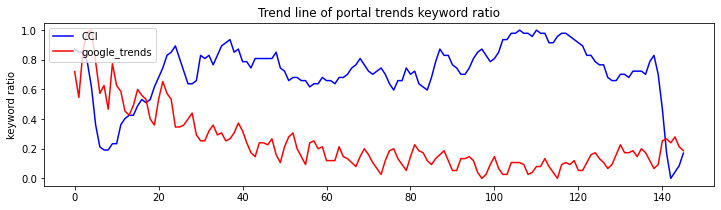

In [134]:
# cci 100이상 호황 / 100미만 불황
plt.figure(figsize = (12,3))
plt.plot(google_cci['cci'], color="blue", label = 'CCI')
plt.plot(google_cci['cnt'], color='red', label = 'google_trends')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

--> CCI와 구글 트렌드에의 '경제'검색 비율의 추세가 반대됨을 확인할 수 있다.

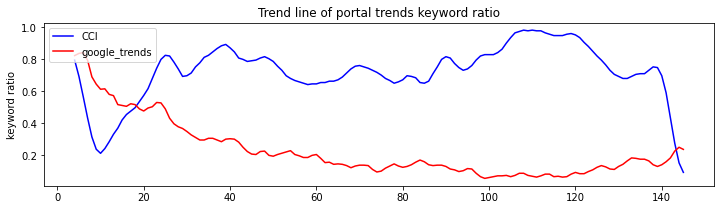

In [135]:
cnt_roll = pd.Series.rolling(google_cci['cnt'], window=5, center = False).mean()
cci_roll = pd.Series.rolling(google_cci['cci'], window=5, center = False).mean()

plt.figure(figsize = (12,3))
cci_roll.plot(color='blue', label='CCI')
cnt_roll.plot(color='red', label='google_trends')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

--> 이동평균으로, CCI와 구글 트렌드에의 '경제'검색 비율의 추세가 반대됨을 더 smooth하게 확인한다.

### kakao

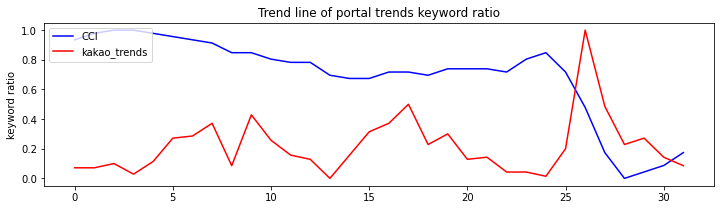

In [136]:
# cci 100이상 호황 / 100미만 불황
plt.figure(figsize = (12,3))
plt.plot(kakao_cci['cci'], color="blue", label = 'CCI')
plt.plot(kakao_cci['cnt'], color='red', label = 'kakao_trends')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

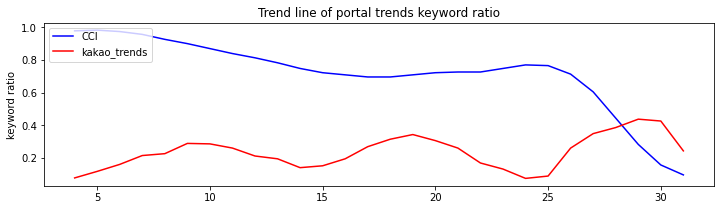

In [137]:
cnt_roll = pd.Series.rolling(kakao_cci['cnt'], window=5, center = False).mean()
cci_roll = pd.Series.rolling(kakao_cci['cci'], window=5, center = False).mean()

plt.figure(figsize = (12,3))
cci_roll.plot(color='blue', label='CCI')
cnt_roll.plot(color='red', label='kakao_trends')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

### naver 

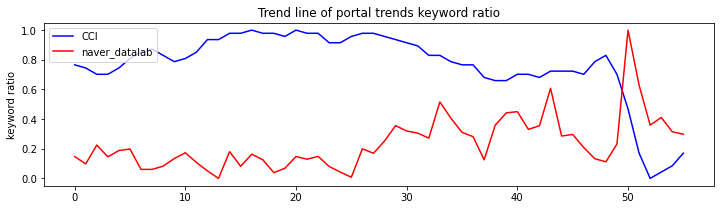

In [138]:
# cci 100이상 호황 / 100미만 불황
plt.figure(figsize = (12,3))
plt.plot(naver_cci['cci'], color="blue", label = 'CCI')
plt.plot(naver_cci['cnt'], color='red', label = 'naver_datalab')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

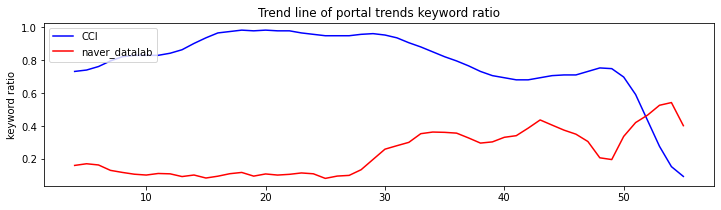

In [139]:
cnt_roll = pd.Series.rolling(naver_cci['cnt'], window=5, center = False).mean()
cci_roll = pd.Series.rolling(naver_cci['cci'], window=5, center = False).mean()

plt.figure(figsize = (12,3))
cci_roll.plot(color='blue', label='CCI')
cnt_roll.plot(color='red', label='naver_datalab')
plt.title("Trend line of portal trends keyword ratio")
plt.ylabel("keyword ratio")
plt.legend(loc='upper left')

plt.show()

## Correlation Coefficient between CCI and trends

In [140]:
google_cci[['cnt', 'cci']].corr(method='pearson')
# -0.401755: -0.7~-0.3은 강한 음의 상관 관계를 가진다.

,cnt,cci
cnt,1.000000,-0.401755
cci,-0.401755,1.000000


In [141]:
kakao_cci[['cnt', 'cci']].corr(method='pearson')
# -0.23828: 음의 상관 관계를 가진다

,cnt,cci
cnt,1.00000,-0.23828
cci,-0.23828,1.00000


In [142]:
naver_cci[['cnt', 'cci']].corr(method='pearson')
# 0-0.52491: -0.7~-0.3은 강한 음의 상관 관계를 가진다.

,cnt,cci
cnt,1.00000,-0.52491
cci,-0.52491,1.00000


## 단순 회귀분석 결과

### google

In [143]:
res = ols('cci~cnt', data = google_cci).fit()
res.summary()
# 단순회귀분석결과 계수는 -0.41로 두 변수는 음의 관계를 보이며, 유의수준 0.05에서 p-value는 0.05보다 작으므로 통계적으로 유의미하다고 할 수있다.
# 결정계수가 0.16으로 선형의 관계가 강하지는 않다고 해석할 수 있다. 따라서 cnt와 cci는 선형관계가 아닌 비선형관계일 수도 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cci   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     27.72
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           5.01e-07
Time:                        03:23:11   Log-Likelihood:                 39.226
No. Observations:                 146   AIC:                            -74.45
Df Residuals:                     144   BIC:                            -68.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8123      0.024     33.742      0.000       0.765       0.860
cnt           -0.4099      0.078     -5.265      0.000      -0.564      -0.256
==============================================================================
Omnibus:                       40.911   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.149
Skew:                          -1.209   Prob(JB):                     1.19e-19
Kurtosis:                       5.912   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'cci')

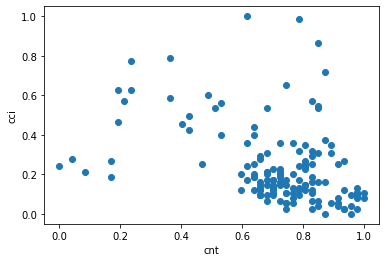

In [144]:
plt.scatter(google_cci['cci'], google_cci['cnt'])
plt.xlabel('cnt')
plt.ylabel('cci')
# 그래프를 확인하면 어느정도 음의 관계를 확인할 수 있다.

### kakao

In [145]:
res = ols('cci~cnt', data = kakao_cci).fit()
res.summary()
# 단순회귀분석결과 계수는 -0.3473으로 두 변수는 음의 관계를 보이며, 유의수준 0.05에서 p-value는 0.189로 유의하지않다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cci   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.806
Date:                Sat, 31 Oct 2020   Prob (F-statistic):              0.189
Time:                        03:23:20   Log-Likelihood:                -4.0761
No. Observations:                  32   AIC:                             12.15
Df Residuals:                      30   BIC:                             15.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7699      0.076     10.161      0.000       0.615       0.925
cnt           -0.3473      0.258     -1.344      0.189      -0.875       0.181
==============================================================================
Omnibus:                       12.438   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.079
Skew:                          -1.429   Prob(JB):                      0.00238
Kurtosis:                       3.945   Cond. No.                         5.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.scatter(kakao_cci['cci'], kakao_cci['cnt'])
plt.xlabel('cnt')
plt.ylabel('cci')

### naver

In [146]:
res = ols('cci~cnt', data = naver_cci).fit()
res.summary()
# 단순회귀분석결과 계수는 -0.7144로 두 변수는 음의 관계를 보이며, 유의수준 0.05에서 p-value는 0.05보다 작으므로 통계적으로 유의미하다고 할 수있다.
# 결정계수가 0.276으로 선형의 관계가 강하지는 않다고 해석할 수 있다. 따라서 cnt와 cci는 선형관계가 아닌 비선형관계일 수도 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cci   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     20.54
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           3.28e-05
Time:                        03:23:25   Log-Likelihood:                 9.3716
No. Observations:                  56   AIC:                            -14.74
Df Residuals:                      54   BIC:                            -10.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9331      0.046     20.075      0.000       0.840       1.026
cnt           -0.7144      0.158     -4.532      0.000      -1.030      -0.398
==============================================================================
Omnibus:                       29.536   Durbin-Watson:                   0.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.818
Skew:                          -1.754   Prob(JB):                     2.06e-12
Kurtosis:                       6.279   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'cci')

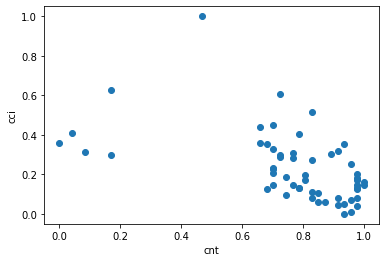

In [147]:
plt.scatter(naver_cci['cci'], naver_cci['cnt'])
plt.xlabel('cnt')
plt.ylabel('cci')